# Assignment-5 | Sahil Sareen RA1911003010464

### 18CSE398J Machine Learning - Core Concepts with Applications

#### Classification using Decision Trees and Random Forest Algorithms on Drugs Dataset.

##### About the Dataset - Dataset on set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

***

### Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

file = 'drug.csv'
df = pd.read_csv(file)

### Data Exploration

In [2]:
df.head()

,age,sex,bp,cholesterol,Na_to_K,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.dtypes

age              int64
sex             object
bp              object
cholesterol     object
Na_to_K        float64
drug            object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.memory_usage()

Index           128
age            1600
sex            1600
bp             1600
cholesterol    1600
Na_to_K        1600
drug           1600
dtype: int64

In [6]:
df.nunique()

age             57
sex              2
bp               3
cholesterol      2
Na_to_K        198
drug             5
dtype: int64

In [7]:
df['sex'].value_counts()

M    104
F     96
Name: sex, dtype: int64

In [8]:
df['bp'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: bp, dtype: int64

In [9]:
df['cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: cholesterol, dtype: int64

In [10]:
df['drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: drug, dtype: int64

### Data cleaning and Further Exploration

In [11]:
inputs = df.drop('drug',axis='columns')

#### string variable dropped.

In [12]:
inputs.sex = inputs.sex.map({'M': 1, 'F': 2})

In [13]:
inputs.bp = inputs.bp.map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})

In [14]:
inputs.cholesterol = inputs.cholesterol.map({'NORMAL': 1, 'HIGH': 2})

In [15]:
inputs.head()

,age,sex,bp,cholesterol,Na_to_K
0,23,2,2,2,25.355
1,47,1,0,2,13.093
2,47,1,0,2,10.114
3,28,2,1,2,7.798
4,61,2,0,2,18.043


In [16]:
inputs.describe()

,age,sex,bp,cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,1.480000,1.065000,1.515000,16.084485
std,16.544315,0.500854,0.839224,0.501029,7.223956
min,15.000000,1.000000,0.000000,1.000000,6.269000
25%,31.000000,1.000000,0.000000,1.000000,10.445500
50%,45.000000,1.000000,1.000000,2.000000,13.936500
75%,58.000000,2.000000,2.000000,2.000000,19.380000
max,74.000000,2.000000,2.000000,2.000000,38.247000


In [17]:
inputs.min()

age            15.000
sex             1.000
bp              0.000
cholesterol     1.000
Na_to_K         6.269
dtype: float64

In [18]:
inputs.max()

age            74.000
sex             2.000
bp              2.000
cholesterol     2.000
Na_to_K        38.247
dtype: float64

In [19]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    int64  
 2   bp           200 non-null    int64  
 3   cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


#### Preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder
xy_drug = LabelEncoder()

In [21]:
inputs['drug_n'] = xy_drug.fit_transform(df['drug'])
target = inputs.drug_n

#### Drug column is converted from string to integer.

In [22]:
inputs

,age,sex,bp,cholesterol,Na_to_K,drug_n
0,23,2,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,2,1,2,7.798,3
4,61,2,0,2,18.043,4
...,...,...,...,...,...,...
195,56,2,0,2,11.567,2
196,16,1,0,2,12.006,2
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


### Data Visualization

In [23]:
sns.set_theme(style="darkgrid")

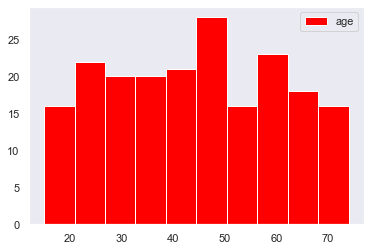

In [24]:
df['age'].hist(grid=False, color='red', legend = 'true');

#### It can be observed that most number of patients are aged around 50.

<AxesSubplot:xlabel='sex', ylabel='count'>

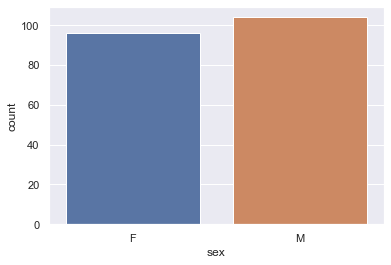

In [25]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='bp', ylabel='count'>

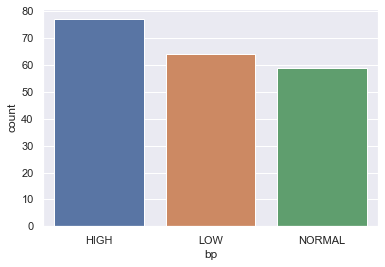

In [26]:
sns.countplot(df['bp'])

#### It can be observed that most of the patients also suffer from high blood pressure.

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

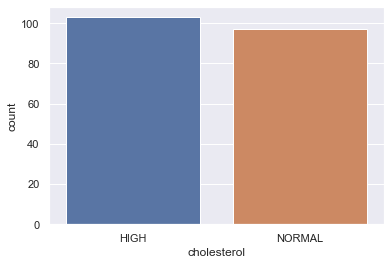

In [27]:
sns.countplot(df['cholesterol'])

#### It can be observed that high number of patients also suffer from high cholesterol.

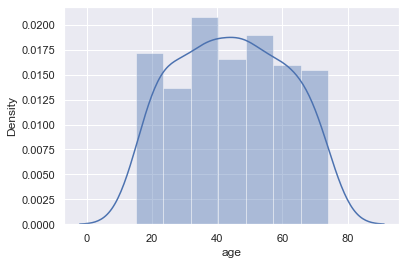

In [28]:
sns.distplot(inputs['age']);

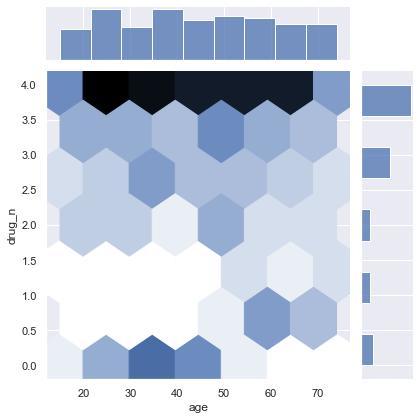

In [29]:
sns.jointplot(inputs['age'],inputs['drug_n'],kind='hex')

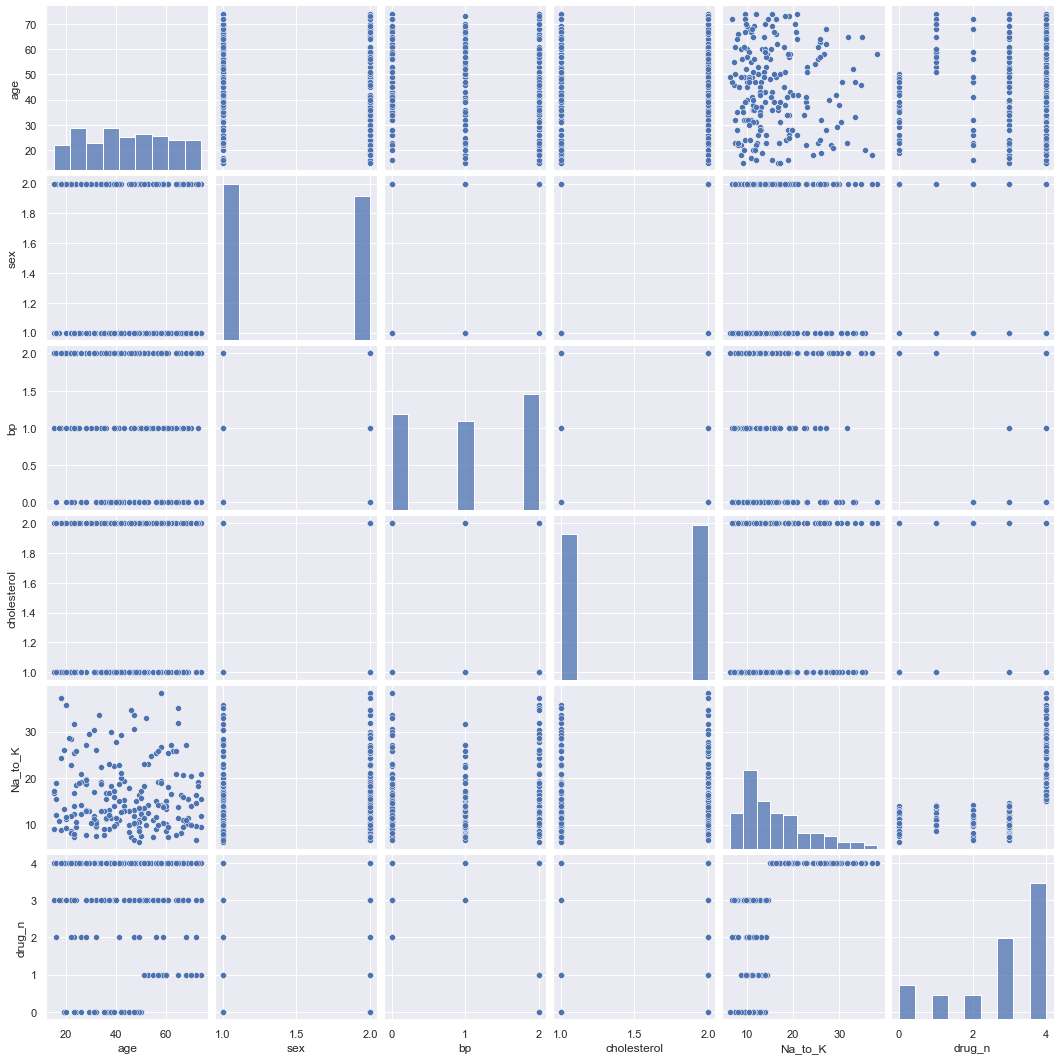

In [30]:
sns.pairplot(inputs)

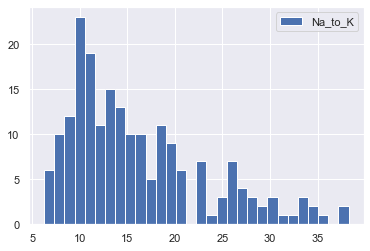

In [31]:
df['Na_to_K'].hist(bins = 30, legend = 'true');

#### It can be observed that high number of patients record Na_to_K value around the number 10.

Text(0, 0.5, 'Na_to_K')

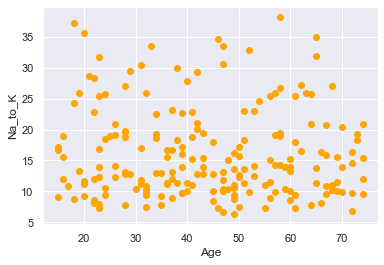

In [32]:
plt.scatter(df.age, df.Na_to_K, color = 'orange')
plt.xlabel('Age')
plt.ylabel('Na_to_K')

<AxesSubplot:xlabel='sex'>

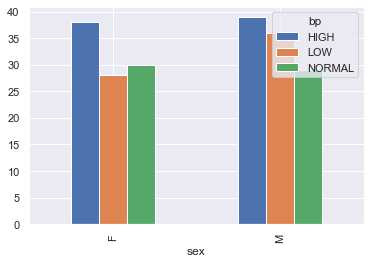

In [33]:
pd.crosstab(df.sex,df.bp).plot(kind='bar')

### Model Building

In [34]:
inputs_n = inputs.drop(['drug_n'],axis='columns')

#### target variable dropped.

In [35]:
inputs_n

,age,sex,bp,cholesterol,Na_to_K
0,23,2,2,2,25.355
1,47,1,0,2,13.093
2,47,1,0,2,10.114
3,28,2,1,2,7.798
4,61,2,0,2,18.043
...,...,...,...,...,...
195,56,2,0,2,11.567
196,16,1,0,2,12.006
197,52,1,1,2,9.894
198,23,1,1,1,14.020


In [36]:
target

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: drug_n, Length: 200, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.4)

### Decision Tree Classification Algorithm

In [39]:
from sklearn import tree
modeltree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random', min_samples_split=3, max_features=None, random_state=None, max_leaf_nodes=None)

In [40]:
modeltree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3,
                       splitter='random')

In [41]:
modeltree.score(X_test,y_test)

0.925

In [42]:
modeltree.predict([[25,1,0,2,15]])

array([4])

In [43]:
modeltree.predict([[47,1,1,2,13]])

array([3])

In [44]:
y_treepredicted = modeltree.predict(X_test)

### Random Forest Classification Algorithm

In [45]:
from sklearn.ensemble import RandomForestClassifier
modelforest = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=True, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [46]:
modelforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       warm_start=True)

#### Different hyperparameters chosen for both the algorithms.

In [47]:
modelforest.score(X_test,y_test)

0.95

In [48]:
modelforest.predict([[35,2,0,1,15]])

array([4])

In [49]:
y_forestpredicted = modelforest.predict(X_test)

### Comparison of the Two Models: 

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

#### Accuracy Score

##### Decision Trees

In [51]:
print("Accuracy of Decision Tree classifier on test set:",accuracy_score(y_test, y_treepredicted))

Accuracy of Decision Tree classifier on test set: 0.925


##### Random Forest

In [52]:
print("Accuracy of Random Forest classifier on test set:",accuracy_score(y_test, y_forestpredicted))

Accuracy of Random Forest classifier on test set: 0.95


#### It has been observed that Random forest classifier has been consistently giving more accurate results than the latter. In this particulal dataset because we have chosen the hyperparameter splitter as random for decision tree classifier.

#### Precision Score

##### Decision Tree

In [53]:
print("Precision of Decision Tree classifier on test set:",precision_score(y_test, y_treepredicted, average='micro'))

Precision of Decision Tree classifier on test set: 0.925


##### Random Forest

In [54]:
print("Precision of Random Forest classifier on test set:",precision_score(y_test, y_forestpredicted, average='micro'))

Precision of Random Forest classifier on test set: 0.95


#### Recall Score

##### Decision Tree

In [55]:
print("Recall Score of Decision Tree classifier on test set:",recall_score(y_test, y_treepredicted, average='micro'))

Recall Score of Decision Tree classifier on test set: 0.925


##### Random Forest

In [56]:
print("Recall Score of Decision Tree classifier on test set:",recall_score(y_test, y_forestpredicted, average='micro'))

Recall Score of Decision Tree classifier on test set: 0.95


#### Confusion Matrices

##### Decision Tree

In [57]:
cmtree = confusion_matrix(y_test, y_treepredicted)
cmtree

array([[10,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  5,  0,  1],
       [ 0,  0,  0, 21,  0],
       [ 0,  1,  0,  4, 31]], dtype=int64)

##### Random Forest

In [58]:
cmforest = confusion_matrix(y_test, y_forestpredicted)
cmforest

array([[10,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  3,  3,  0],
       [ 0,  0,  0, 20,  1],
       [ 0,  0,  0,  0, 36]], dtype=int64)

#### Feature importance in Decision Tree

In [59]:
modeltree.feature_importances_

array([0.09876663, 0.00471706, 0.36285007, 0.07947269, 0.45419354])

#### Feature importance in Random Forest

In [60]:
modelforest.feature_importances_

array([0.13207239, 0.01125081, 0.23604216, 0.04851376, 0.57212087])

#### Metrics

##### Decision Tree

In [61]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_treepredicted))
print('MSE:', metrics.mean_squared_error(y_test, y_treepredicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_treepredicted)))

MAE: 0.1125
MSE: 0.2125
RMSE: 0.4609772228646444


##### Random Forest

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_forestpredicted))
print('MSE:', metrics.mean_squared_error(y_test, y_forestpredicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_forestpredicted)))

MAE: 0.05
MSE: 0.05
RMSE: 0.22360679774997896


#### Heatmap

##### Decision Tree

Text(66.5, 0.5, 'Truth')

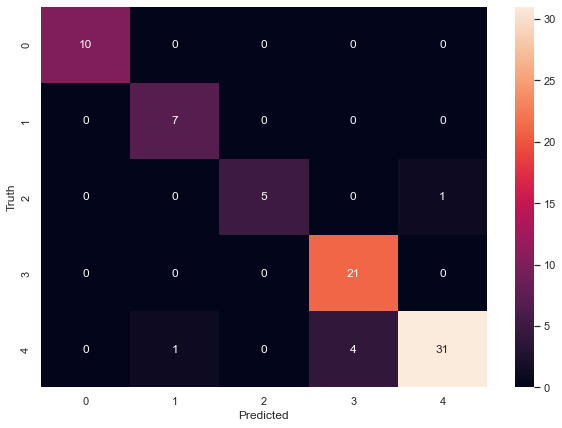

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(cmtree, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Random Forest

Text(66.5, 0.5, 'Truth')

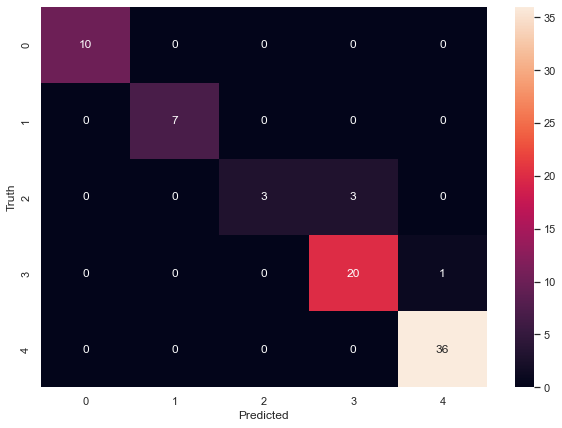

In [64]:
plt.figure(figsize=(10,7))
sns.heatmap(cmforest, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Scatter Plot

##### Decision Tree

Text(0, 0.5, 'Predicted Y')

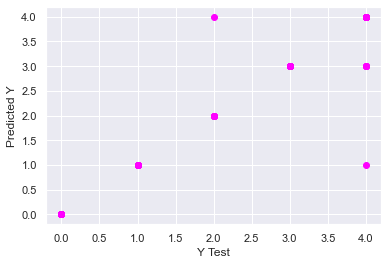

In [65]:
plt.scatter(y_test, y_treepredicted, color='magenta')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

##### Random Forest

Text(0, 0.5, 'Predicted Y')

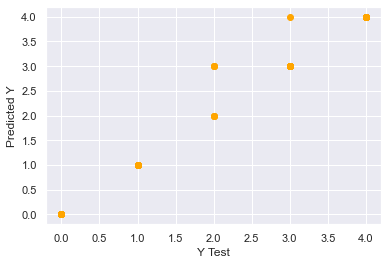

In [66]:
plt.scatter(y_test, y_forestpredicted, color='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Validation Curves

##### Decision Tree

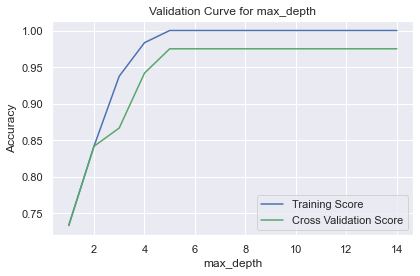

In [67]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = list(range(1, 15)), cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(list(range(1, 15)), mean_train_score,label = "Training Score", color = 'b')
plt.plot(list(range(1, 15)), mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

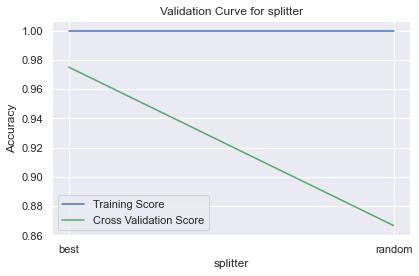

In [68]:
train_scoreNum, test_scoreNum = validation_curve(
                                DecisionTreeClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'splitter', 
                                param_range = ("best", "random"), cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(("best", "random"), mean_train_score,label = "Training Score", color = 'b')
plt.plot(("best", "random"), mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for splitter")
plt.xlabel("splitter")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

##### Random Forest

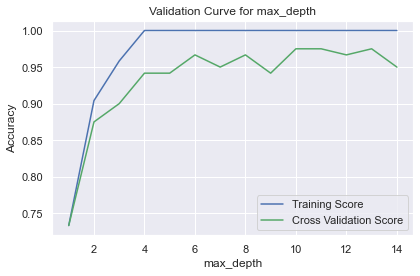

In [69]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = list(range(1, 15)), cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(list(range(1, 15)), mean_train_score,label = "Training Score", color = 'b')
plt.plot(list(range(1, 15)), mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

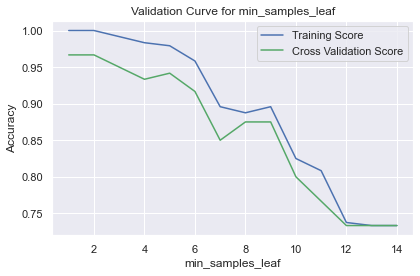

In [70]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = list(range(1, 15)), cv = 3)
mean_train_score = np.mean(train_scoreNum, axis = 1)
mean_test_score = np.mean(test_scoreNum, axis = 1)
# Plot mean accuracy scores for training and testing scores
plt.plot(list(range(1, 15)), mean_train_score,label = "Training Score", color = 'b')
plt.plot(list(range(1, 15)), mean_test_score,label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve for min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Predictions

##### Decision Tree

In [71]:
treepredicted = modeltree.predict(X_test)
treepredicted

array([4, 4, 4, 4, 4, 0, 3, 4, 0, 4, 4, 4, 4, 3, 1, 2, 3, 0, 2, 4, 3, 1,
       3, 4, 1, 3, 0, 3, 3, 4, 0, 3, 4, 1, 1, 2, 0, 3, 2, 3, 4, 3, 3, 4,
       4, 3, 3, 3, 4, 0, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 0, 4, 1, 4, 1,
       4, 4, 3, 3, 0, 2, 4, 3, 4, 3, 4, 1, 4, 0])

##### Random Forest

In [72]:
forestpredicted = modelforest.predict(X_test)
forestpredicted

array([4, 4, 4, 4, 4, 0, 3, 4, 0, 4, 4, 4, 4, 4, 1, 3, 3, 0, 3, 4, 3, 1,
       3, 4, 1, 3, 0, 4, 3, 4, 0, 3, 4, 1, 1, 2, 0, 3, 2, 4, 4, 3, 3, 4,
       4, 3, 3, 3, 4, 0, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 0, 3, 1, 4, 1,
       4, 4, 4, 3, 0, 2, 4, 3, 4, 4, 4, 4, 4, 0])